# Лабораторная работа №2

## 1.1 Оценки математического ожидания, дисперсии, медианы

### 1 задача

Пусть случайная величина, $\xi $ имеет распределение, задаваемое плотностью
${f}_{\xi}(x) = {\theta}^{2} x e^{-\theta x}$. Для каждого $\theta \in \{0.5, 2, 8\}$:

**(a)** Аналитически вычислить математическое ожидание, дисперсию и математическое ожидание квадрата $\xi$.

Плотность этого распределения похожа на плотность Гамма-распределения: 

$f\left(x\left|a,\lambda\right.\right)=\left\{\begin{matrix}\frac{\left(x^{\lambda-1}e^{-\frac{x}{a}}\right)}{\Gamma\left(\lambda\right)a^{\lambda}} & x\geqslant0\\ 0 & x<0\end{matrix}\right.$

В нашем случае 
$\displaylines{x\geqslant0}$, так как функция плотности распределения положительно определена, а экспонента и параметр в квадрате неотрицательны, 

$\displaylines{\lambda=2}$ - форма распределения

$\displaylines{a=\frac{1}{\theta}}$ - масштаб распределения

И действительно при подстановке мы получим нашу исходную функцию. ($\displaylines{\Gamma\left(\lambda\right)=n!}$)

Для Гамма-распределения определены следующие формулы вычисления среднего и дисперсии через параметры распределения: 

$\displaylines{E\xi=a\lambda=\frac{2}{\theta}}$

$\displaylines{D\xi=a^2\lambda=\frac{2}{\theta^2}}$

$\displaylines{E\xi^2=D\xi+\left(E\xi\right)^2=\frac{2}{\theta^2}+\frac{4}{\theta^2}=\frac{6}{\theta^2}\\ }$

**(b)** Для $k \in \{2^{4}, 2^{5}, ..., 2^{15}\}$ построить выборку из $k$ элементов. Для каждой из них посчитать оценки: математического ожидания, дисперсии и квадрата математического ожидания параметра из варианта. Для каждой из выборок и оценок визуализировать это все
на графиках (для каждой оценки — свой график), где по вертикальной оси — оценка, а по горизонтальной — $k$, плюс, добавьте
горизонтальную линию, отвечающую за аналитически полученную оценку.

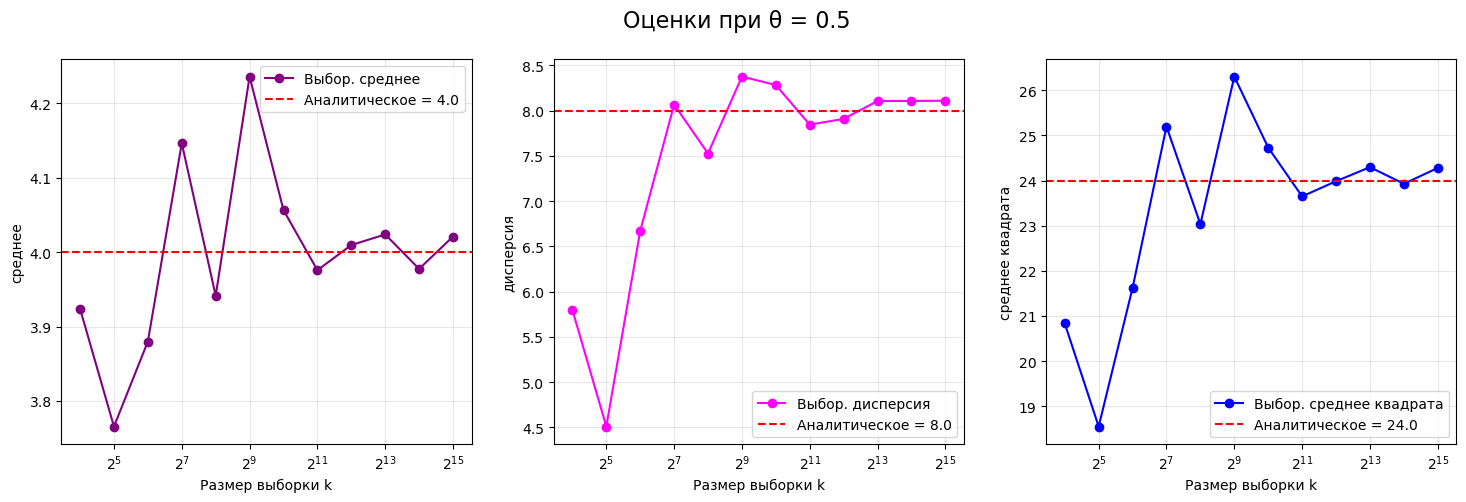

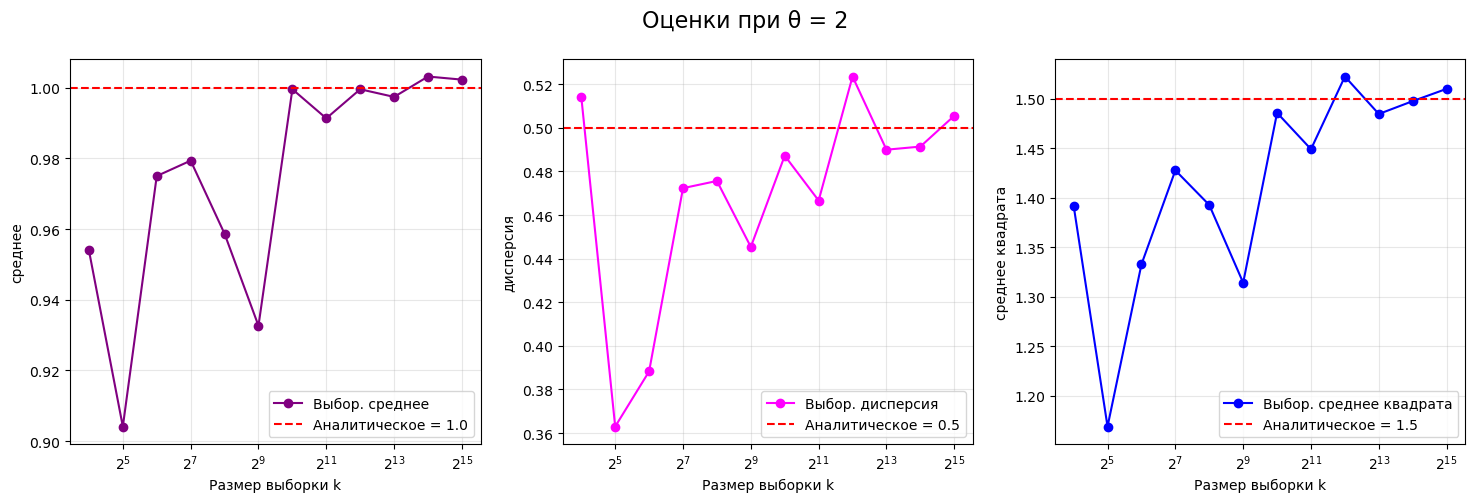

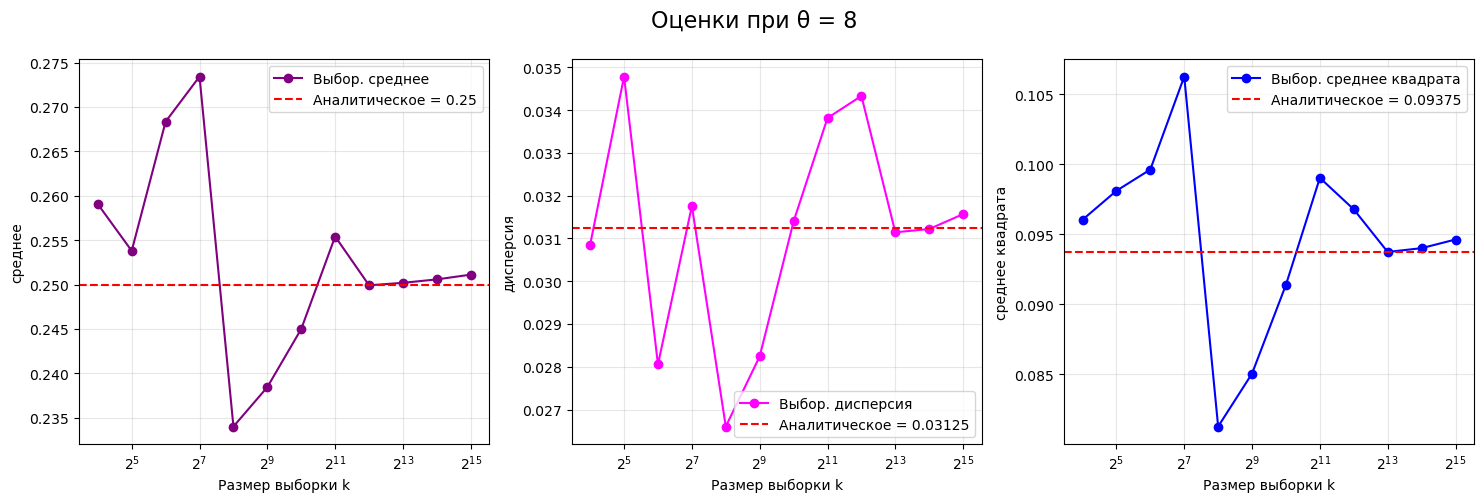

In [149]:
import numpy as np 
import matplotlib.pyplot as plt
np.random.seed(42)

thetas = [0.5, 2, 8]
ks = [2 ** i for i in range(4, 16)]

#функция для расчета аналитических значений
def an_values (theta):
    a_mean = 2/theta
    a_var = 2/theta**2
    a_mean2 = 6/theta**2
    return a_mean, a_var, a_mean2

#функция для визуализации 
def plot_est (theta, ks, mean, var, mean2):
    a_mean, a_var, a_mean2 = an_values(theta)
    names = ['среднее', 'дисперсия', 'среднее квадрата']
    a_values = [a_mean, a_var, a_mean2]  # Аналитические значения для каждого графика
    e_values = [mean, var, mean2]
    p_col = ['purple', 'fuchsia', 'blue']
    fig, axes = plt.subplots(1, 3, figsize = (18, 5))
    fig.suptitle(f'Оценки при θ = {theta}', fontsize = 16)
    for i, name in enumerate(names):
        axes[i].plot(ks, e_values[i], 'o-', label = f'Выбор. {name}', color = p_col[i])
        axes[i].axhline(a_values[i], color = 'red', linestyle = '--', label = f'Аналитическое = {a_values[i]}')
        axes[i].set_xscale('log', base = 2)
        axes[i].set_xlabel('Размер выборки k')
        axes[i].set_ylabel(f'{name}')
        axes[i].legend()
        axes[i].grid(True, alpha = 0.3)   

for t in thetas:
    mean = []
    var = []
    mean2 = []

    for k in ks:
        sample = np.random.gamma(shape = 2, scale = 1/t, size = k)
        mean.append(sample.mean())
        var.append(sample.var(ddof = 1))
        mean2.append((sample**2).mean())

    plot_est(t, ks, mean, var, mean2)


### 2 задача

Дана плотность распределения случайной величины $\xi$:

$$
f_{\xi}^{\lambda, a}(x) =
\begin{cases} 
\lambda e^{-\lambda(x-a)}, & x \geq a \\
0, & \text{else}
\end{cases}
$$

Пусть $(\lambda, a) = (2, 2)$

**(a)** Аналитически вычислите значение моды, математического ожидания и медианы.

Можно заметить, что это показательное распределение со смещением. Подставим параметры для вычисления показателей. 

$\displaylines{f_{\xi}=2e^{-2\left(x-2\right)},x\geqslant2}$

**Мода** - максимальное значение плотности. Производная от нашей функции будет с коэффициентом -4, что свидетельствует о том, что функция убывает от 2 до бесконечности (заданная область определения) => максимум будет в х=2, f(2) = 2.

$Mo = 2$

**Математическое ожидание** (тут приведено более краткое решение, но все вычисления через интегралы были прорешены мной от руки в тетради и сверены с полученными ответами)

Показательное распределение это частный случай Гамма-распределения с параметром формы равным 1, а параметром масштаба равным $1/\lambda$. Также не стоит забывать про сдвиг по x на 2 вправо.

Таким образом, мы можем вычислить мат. ожидание по формуле Гамма-распределения с учетом сдвига: 

$E\xi=1\lambda + 2 = 1/2 + 2 = 2.5$

**Медиана** - точка в которой функция распределения равна 0.5. 

Функция обычного показательного распределения: $F(x) = 1 - e^{\lambda x}, x\geqslant0$

В нашем случае с параметром 2 и сдвигом 2: $F(x) = 1 - e^{2(x-2)}, x\geqslant2$

Решаем уравнение: 

$\displaylines{1-e^{-2x+4}=0.5\\ e^{-2x+4}=0.5\\ -2x+4=-\ln(2)\\ 2x=\ln(2)+4\\ x=\frac{\ln(2)}{2}+2\\ }$

$ Me = ln(2)/2 + 2$

**(b)** Создайте две выборки: одну довольно большого размера (10000 наблюдений, например), а вторую маленькую (например, 20). Постройте оценки моды, математического ожидания и медианы.

In [124]:
from scipy import stats 
lambda_v, a = 2,2
sizes = [20, 10000]
#это показательное распределение со сдвигом
def gen_sample (size):
    sample = stats.expon.rvs(loc = a, scale = 1/lambda_v, size = size)
    return sample

def get_mmm(sample):
    mode_ = stats.mode(sample)[0]
    mean_ = sample.mean()
    median_ = np.median(sample)
    return mode_, mean_, median_
    
sample_s = gen_sample(20)
sample_l = gen_sample(10000)

mode_s,mean_s,median_s = get_mmm(sample_s)
mode_l,mean_l,median_l = get_mmm(sample_l)

print(f"""Выборка 20:
Оценка моды: {mode_s:.4f}
Оценка матожидания: {mean_s:.4f}
Оценка медианы: {median_s:.4f}

Выборка 10000:
Оценка моды: {mode_l:.4f}
Оценка матожидания: {mean_l:.4f}
Оценка медианы: {median_l:.4f}""")

Выборка 20:
Оценка моды: 2.0576
Оценка матожидания: 2.7322
Оценка медианы: 2.6225

Выборка 10000:
Оценка моды: 2.0000
Оценка матожидания: 2.4998
Оценка медианы: 2.3485


**(c)** Постройте для первой выборки на одном графике: гистограмму
распределения значений из выборки и три вертикальных линии
оценок моды, математического ожидания и медианы. Для второй
выборки сделайте то же самое. Постройте ещё график рядом для
первой выборки, но с функцией распределения плотности и аналитическими значениями мод, математического жидания и медианы.
То же самое, для второй.

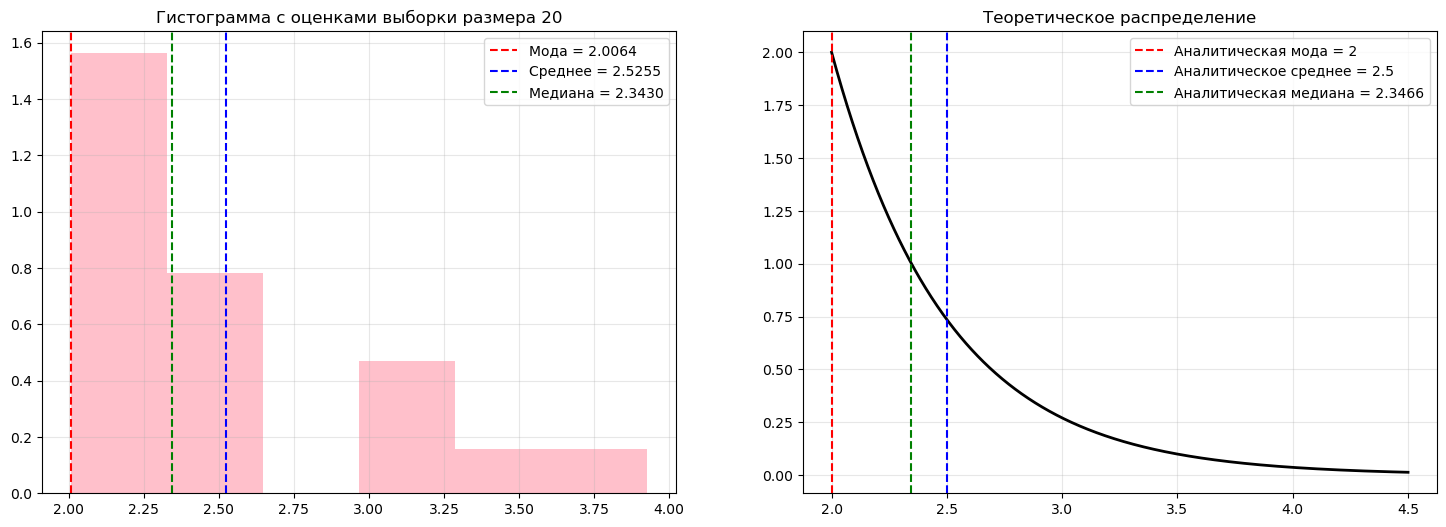

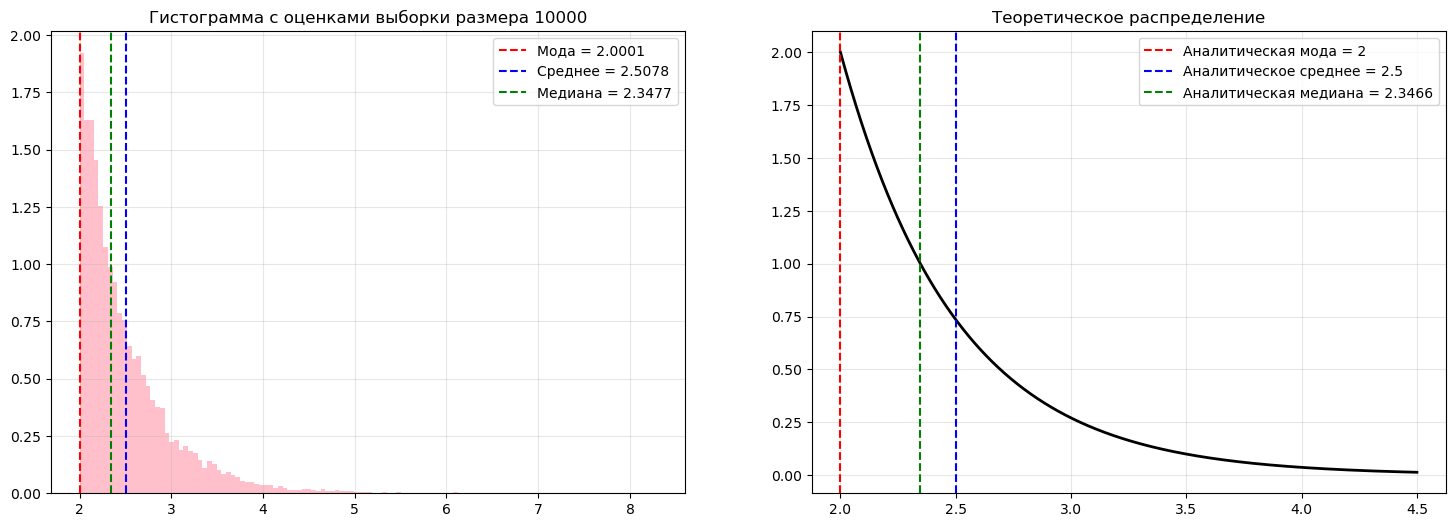

In [129]:
## Подготовим аналитические значения для графиков
mode_t = a
mean_t = a + 1/lambda_v
median_t = a + np.log(2) / lambda_v
x = np.linspace(a, a + 5/lambda_v, 1000)
y = stats.expon(loc = a, scale = 1/lambda_v).pdf(x)


def plot_e (sample):
    mode_, mean_, median_ = get_mmm(sample)
    fig, axes = plt.subplots(1, 2, figsize = (18, 6))
    axes[0].hist(sample, bins = 'auto', density = True, color = 'pink')
    axes[0].axvline(mode_, color = 'red', linestyle = '--', label = f'Мода = {mode_:.4f}')
    axes[0].axvline(mean_, color = 'blue', linestyle = '--', label = f'Среднее = {mean_:.4f}')
    axes[0].axvline(median_, color = 'green', linestyle = '--', label = f'Медиана = {median_:.4f}')
    axes[0].legend()
    axes[0].grid(True, alpha = 0.3)
    axes[0].set_title(f'Гистограмма с оценками выборки размера {len(sample)}')

    axes[1].plot(x, y, 'k-', linewidth = 2)
    axes[1].axvline(mode_t, color = 'red', linestyle = '--', label = f'Аналитическая мода = {mode_t}')
    axes[1].axvline(mean_t, color = 'blue', linestyle = '--', label = f'Аналитическое среднее = {mean_t}')
    axes[1].axvline(median_t, color = 'green', linestyle = '--', label = f'Аналитическая медиана = {median_t:.4f}')
    axes[1].legend()
    axes[1].grid(True, alpha = 0.3)
    axes[1].set_title('Теоретическое распределение')

for size in sizes:
    plot_e(gen_sample (size))

**(d)** Попробуйте поизменять размер выборки и посмотреть на то, например, сходится ли медиана к математическому ожиданию, или
нет.

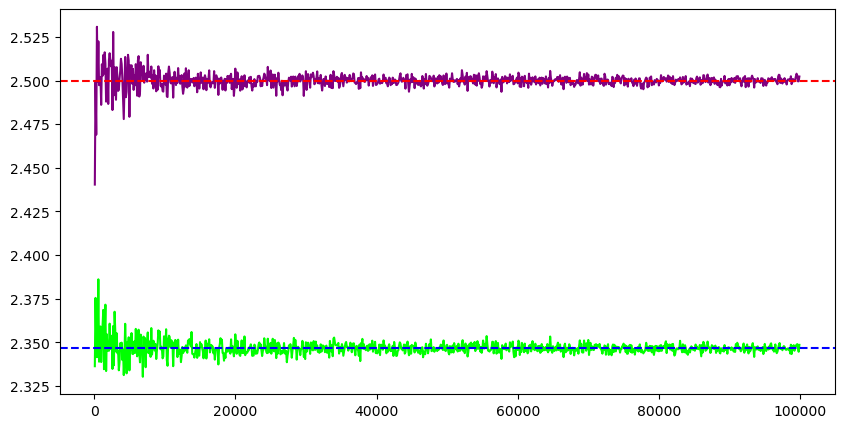

In [117]:
sizes = [i for i in range(100, 100000, 100)]
meanX, medianX = [], []

for size in sizes:
    sample = gen_sample (size)
    meanX.append(get_mmm(sample)[1])
    medianX.append(get_mmm(sample)[2])

plt.figure(figsize = (10, 5))
plt.plot(sizes, meanX, '-', label = 'Выборочное среднее', color = 'purple')
plt.plot(sizes, medianX, '-', label = 'Выборочная медиана', color = 'lime')
plt.axhline(mean_t, linestyle = '--', label = 'Аналитическое среднее', color = 'red')
plt.axhline(median_t, linestyle = '--', label = 'Аналитическая медиана', color = 'blue')

## 1.2 Моделирование совместного распределения двух СВ

Пусть совместное распределение двух случайных величин задано таблицей


\begin{array}{c|cccc|c}
\xi \backslash \eta & 1 & 2 & 3 & \cdots \\
\hline
-1 & \frac{2}{5} \cdot \frac{1}{2!} & \frac{2}{5} \cdot \frac{1}{2^2} & \frac{2}{5} \cdot \frac{1}{2^3} & \cdots \\
0 & \frac{1}{5} \cdot \frac{1}{2!} & \frac{1}{5} \cdot \frac{1}{2^2} & \frac{1}{5} \cdot \frac{1}{2^3} & \cdots \\
1 & \frac{2}{5} \cdot \frac{1}{2!} & \frac{2}{5} \cdot \frac{1}{2^2} & \frac{2}{5} \cdot \frac{1}{2^3} & \cdots \\
\end{array}


где $\eta$ принимает все значения из $\mathbb{N}$. Вычислить корреляционную матрицу аналитически и приближенно (на основе моделирования).

Совместное распределение можно расписать как: 

$$
P(\xi=x,\eta=y)=
\begin{cases}
\dfrac{2}{5} \cdot \dfrac{1}{2^y}, & x={-1,1}, y\in\mathbb{N} \\
\dfrac{1}{5} \cdot \dfrac{1}{2^y}, & x=0, y\in\mathbb{N} \\
\end{cases}
$$



Чтобы найти маргинальные распределения, а также удостовериться, что все сходится, проверим сходится ли сумма $1/2^y$ по всем $y$. 
То есть, нам надо найти сумму бесконечной геометрической прогрессии ($q=1/2$ <1): 

$S = \dfrac{b_1}{1-q} = \dfrac{1/2}{1-{1/2}} = 1$, то есть все сходится и мы можем искать маргинальные распеределения. 

Найдем маргинальное распределение, мат. ожидание и дисперсию для $\xi$:

$$
P(\xi=-1)= \frac{2}{5}, \quad P(\xi=0)= \frac{1}{5}, \quad P(\xi=1)= \frac{2}{5}
$$

$$ E\xi = -1\cdot\frac{2}{5}+1\cdot\frac{2}{5} = 0$$

$$E{\xi^2} = 1\cdot\frac{2}{5}+1\cdot\frac{2}{5} = \frac{4}{5}$$

$$D\xi = E{\xi^2} - {E\xi}^2 = \frac{4}{5} - 0 = \frac{4}{5} $$ 

Найдем маргинальное распределение, мат. ожидание и дисперсию для $\eta$:

$$
P(\eta=y) = \frac{1}{2^y}
$$

Это выглядит как геометрическое распределение $P(\eta = y) = (1-p)^{y-1}p$, где $p = 1/2$

Тогда мат. ожидание и дисперсия находятся по формулам для геометрического распределения: 

$$E\eta = \frac{1}{p} = 2$$

$$D\eta = \frac{p-1}{p^2} = 2$$

Теперь вычислим мат. ожидание совместного распределения: 

$$
E\xi\eta = -1 \cdot \frac{2}{5} \sum_{y = 1}^{+\infty} \frac{y}{2^y} + 1 \cdot \frac{2}{5} \sum_{y = 1}^{+\infty} \frac{y}{2^y} = 0
$$

Тогда ковариация будет равна: 

$$cov(\xi, \eta) = E\xi\eta - E\xi E\eta = 0 - 0\cdot2$$

Следовательно корреляция тоже будет равна 0. 

Матрица корреляций: 

$$
\begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}
$$


### Вычисляем приближенно (на основе моделирования)

In [130]:
def gen_join_sample(size):
    xi_vals = [-1, 0, 1]
    xi_p = [2/5, 1/5, 2/5]
    
    xi_sample = np.random.choice(xi_vals, size = size, p = xi_p)
    eta_sample = np.random.geometric(1/2, size = size)

    return xi_sample, eta_sample

def get_md(sample):
    mean_ = sample.mean()
    var_ = sample.var()
    return mean_, var_

def get_cov(sample1, sample2):
    return np.cov(sample1, sample2)[0,1]

def get_cor(sample1, sample2):
    return np.corrcoef(sample1, sample2)

In [145]:
xi, eta = gen_join_sample(10000)
print(f'ξ: Выборочные среднее {get_md(xi)[0]:.5f} и дисперсия {get_md(xi)[1]:.5f}')
print(f'η: Выборочные среднее {get_md(eta)[0]:.5f} и дисперсия {get_md(eta)[1]:.5f}')
print()
print(f'Ковариация = {get_cov(xi, eta):.5f}')
print()
print(f'''Корреляционная матрица: 
{get_cor(xi, eta)}''')

ξ: Выборочные среднее 0.00820 и дисперсия 0.80133
η: Выборочные среднее 2.00730 и дисперсия 1.95985

Ковариация = -0.00336

Корреляционная матрица: 
[[ 1.         -0.00268104]
 [-0.00268104  1.        ]]
